In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.exceptions import ConvergenceWarning
from sklearn.datasets  import load_digits
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from numpy import mean

In [195]:
np.random.seed(42)

In [196]:
mnist = load_digits()

In [197]:
n_samples = len(mnist.images)
images = mnist.images.reshape((n_samples, -1))
images = images.astype("float32")/255
labels = mnist.target

In [198]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

In [199]:
model1 = MLPClassifier(random_state=2, max_iter=100000).fit(X_train, Y_train)
model2 = MLPClassifier(hidden_layer_sizes=(400,150,50), max_iter=100000,activation = 'relu',solver='adam',random_state=1).fit(X_train, Y_train)
model3 = MLPClassifier(hidden_layer_sizes=(400,150,50), max_iter=100000,activation = 'logistic',solver='adam',random_state=2).fit(X_train, Y_train)
model4 = MLPClassifier(hidden_layer_sizes=(64,32,8), max_iter=100000,activation = 'relu',solver='adam',random_state=1).fit(X_train, Y_train)
model5 = MLPClassifier(hidden_layer_sizes=(32,16), max_iter=100000,activation = 'relu',solver='adam',random_state=1).fit(X_train, Y_train)
model6 = MLPClassifier(hidden_layer_sizes=(120,64,16), max_iter=100000,activation = 'relu',solver='adam',random_state=1).fit(X_train, Y_train)
model7 = MLPClassifier(hidden_layer_sizes=(320,120,32), max_iter=100000,activation = 'relu',solver='adam',random_state=1).fit(X_train, Y_train)

In [200]:
scores1 = cross_val_score(model1, images, labels, cv = 5)
scores2 = cross_val_score(model2, images, labels, cv = 5)
scores3 = cross_val_score(model3, images, labels, cv = 5)
scores4 = cross_val_score(model4, images, labels, cv = 5)
scores5 = cross_val_score(model5, images, labels, cv = 5)
scores6 = cross_val_score(model6, images, labels, cv = 5)
scores7 = cross_val_score(model7, images, labels, cv = 5)

In [201]:
predictions1 = model1.predict(X_test)
acc1 = accuracy_score(Y_test, predictions1)
predictions2 = model2.predict(X_test)
acc2 = accuracy_score(Y_test, predictions2)
predictions3 = model3.predict(X_test)
acc3 = accuracy_score(Y_test, predictions3)
predictions4 = model4.predict(X_test)
acc4 = accuracy_score(Y_test, predictions4)
predictions5 = model5.predict(X_test)
acc5 = accuracy_score(Y_test, predictions5)
predictions6 = model6.predict(X_test)
acc6 = accuracy_score(Y_test, predictions6)
predictions7 = model7.predict(X_test)
acc7 = accuracy_score(Y_test, predictions7)

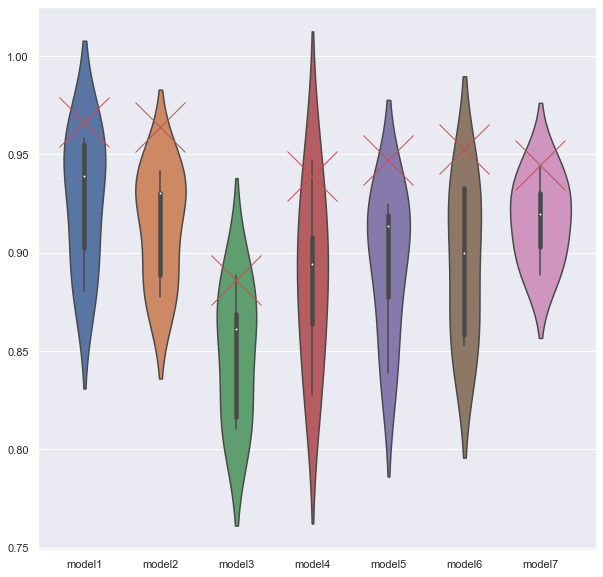

In [202]:
plt = sns.violinplot(gridize = 300, data = [scores1, scores2, scores3, scores4, scores5, scores6, scores7])
labels = plt.set_xticklabels(['model1','model2','model3','model4','model5','model6','model7'])
plt.plot(0, acc1, 'rx', markersize=50)
plt.plot(1, acc2, 'rx', markersize=50)
plt.plot(2, acc3, 'rx', markersize=50)
plt.plot(3, acc4, 'rx', markersize=50)
plt.plot(4, acc5, 'rx', markersize=50)
plt.plot(5, acc6, 'rx', markersize=50)
plt.plot(6, acc7, 'rx', markersize=50)

sns.set(rc={'figure.figsize':(10, 10)})